# Rain Prediction: Weather Forecasting Project

**Author**: Taimoor  
**Goal**: Use machine learning to predict rain (0 = No, 1 = Yes) based on weather features like temperature and humidity.  
**Dataset**: 2500 samples from CSV (synthetic/historical weather data).  
**Key Steps**: Data exploration, baseline models, handle imbalance with SMOTE, evaluate improvements.  
**Tools**: Python, pandas, scikit-learn, imbalanced-learn.  

This project demonstrates handling imbalanced data and evaluating classification models beyond accuracy.

## Step 1: Install Required Libraries
In this step, all required Python libraries are installed for data analysis and machine learning.

In [67]:
!pip install pandas numpy matplotlib scikit-learn


## Step 2: Import Libraries
This step imports the necessary Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn for data processing, visualization, and model training.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

##Step 3: Mount Google Drive
Mount Google Drive to access the dataset stored in your Drive.
Python


In [69]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Step 4: Load the Dataset
Load the weather data from a CSV file in Google Drive and preview the first few rows.
Python

In [70]:
import pandas as pd

file_path = "/content/drive/MyDrive/csv file/weather_forecast_data.csv"  # replace with your copied path
data = pd.read_csv(file_path)

# Check first 5 rows
data.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614189,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


##Step 5: Dataset Information
Inspect the dataset's structure, including data types and non-null counts.
Python

In [71]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.3 KB


##Step 6: Dataset Summary Statistics
Generate descriptive statistics for numerical columns.
Python

In [72]:
data.describe()


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336,0.125600
std,7.326996,19.954739,5.780316,29.123104,20.196433,0.331464
min,10.001842,30.005071,0.009819,0.015038,980.014486,0.000000
25%,16.359398,47.339815,4.761909,23.900016,996.938630,0.000000
50%,22.536448,63.920797,9.908572,49.488284,1013.433035,0.000000
75%,28.976476,81.561021,14.948408,75.324140,1031.735067,0.000000
max,34.995214,99.997481,19.999132,99.997795,1049.985593,1.000000


## Step 6.1: Check for Missing Values
Before proceeding with any preprocessing or modeling, it's important to confirm there are **no missing values** in the dataset. Missing data can cause errors during model training or lead to biased results.

We use `isnull().sum()` to count missing values per column.

In [73]:
data.isnull().sum()


,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


## Step 7: Exploratory Data Analysis (EDA)
We now perform basic Exploratory Data Analysis to:
- Understand the distribution of the target variable (`Rain`)
- Check distributions of numerical features
- Look for relationships between features and the target
- Identify potential patterns or issues (outliers, correlations, etc.)


/tmp/ipython-input-1131030058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rain', data=data, palette='viridis')


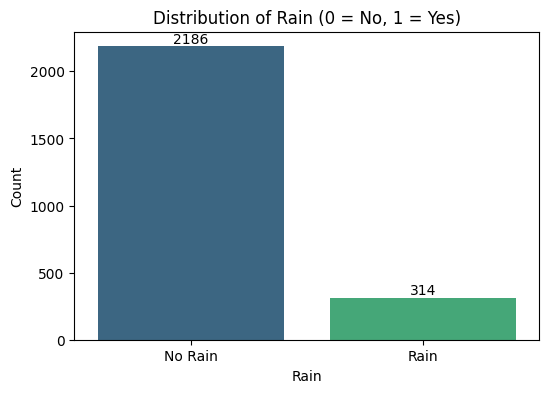

Class distribution (percentages):
Rain
0    87.44
1    12.56
Name: proportion, dtype: float64

Rain samples: 314 (12.56%)


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Count plot for Rain
sns.countplot(x='Rain', data=data, palette='viridis')

plt.title('Distribution of Rain (0 = No, 1 = Yes)')
plt.xlabel('Rain')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Rain', 'Rain'])

# Add count labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5), textcoords='offset points')

plt.show()

# Also print percentages
print("Class distribution (percentages):")
print(data['Rain'].value_counts(normalize=True).round(4) * 100)
print("\nRain samples:", data['Rain'].sum(), f"({data['Rain'].mean()*100:.2f}%)")

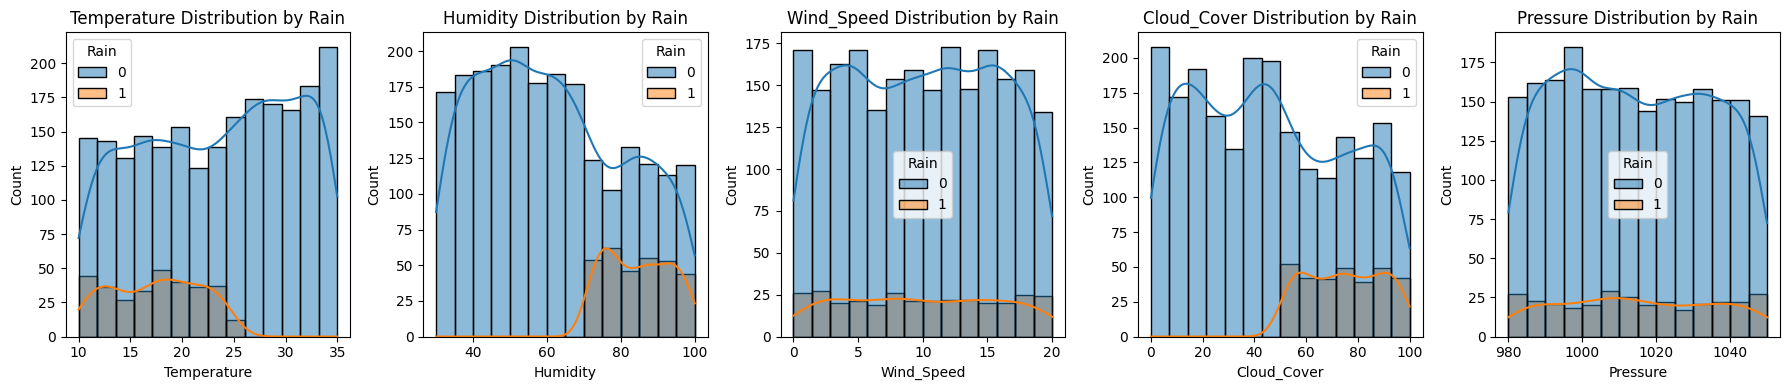

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))

for i, col in enumerate(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']):
    plt.subplot(1, 5, i + 1)
    sns.histplot(data=data, x=col, hue='Rain', kde=True)
    plt.title(f'{col} Distribution by Rain')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Step 7.1: Check Class Balance in Target (Rain)

We check how many rain vs no-rain samples. This reveals imbalance, which can bias models toward "no rain".

In [76]:
print("Class counts:\n", y.value_counts())
print("\nRain percentage:", round(y.mean() * 100, 2), "%")

Class counts:
 Rain
0    2186
1     314
Name: count, dtype: int64

Rain percentage: 12.56 %


## Step 8: Prepare Features (X) and Target (y)

We divide the dataset into two parts:

- **Features (X)** → all the weather measurements the model uses to learn  
- **Target (y)** → what we want to predict (Rain: 0 = no rain, 1 = rain)

This prepares the data for training machine learning models.

In [77]:
# Features (X) = everything except Rain
X = data.drop('Rain', axis=1)

# Target (y) = Rain column
y = data['Rain']

# Quick check
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2500, 5)
y shape: (2500,)


## Step 9: Train-Test Split

We split the data so the model learns on 80% of examples and we test it fairly on the remaining 20%.

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape: (2000, 5)
Test shape:  (500, 5)


## Step 10: Baseline Models (no imbalance handling)

We train three simple models and look at accuracy + how well they detect rain.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.932
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       443
           1       0.73      0.65      0.69        57

    accuracy                           0.93       500
   macro avg       0.84      0.81      0.82       500
weighted avg       0.93      0.93      0.93       500

[[429  14]
 [ 20  37]]


In [81]:
# Random Forest (usually strongest baseline)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500

[[443   0]
 [  1  56]]


**Observation**: High accuracy but very low recall for rain (class 1) → models mostly predict "no rain".

## Step 11: Handle Imbalance with SMOTE

We use SMOTE to create synthetic rain examples so the model learns both classes better.

In [82]:
!pip install imbalanced-learn --quiet

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE: ", pd.Series(y_train_smote).value_counts())

Before SMOTE: Rain
0    1743
1     257
Name: count, dtype: int64
After SMOTE:  Rain
0    1743
1    1743
Name: count, dtype: int64


## Step 12: Models after SMOTE

We train the same models again — now on balanced data.

In [83]:
# Logistic Regression on SMOTE data
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_smote.predict(X_test)

print("Logistic Regression + SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_smote))
print(classification_report(y_test, y_pred_lr_smote))
print(confusion_matrix(y_test, y_pred_lr_smote))

Logistic Regression + SMOTE
Accuracy: 0.894
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       443
           1       0.52      0.89      0.66        57

    accuracy                           0.89       500
   macro avg       0.75      0.89      0.80       500
weighted avg       0.93      0.89      0.91       500

[[396  47]
 [  6  51]]


In [84]:
# Random Forest on SMOTE data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test)

print("\nRandom Forest + SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print(classification_report(y_test, y_pred_rf_smote))
print(confusion_matrix(y_test, y_pred_rf_smote))


Random Forest + SMOTE
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500

[[443   0]
 [  1  56]]


**Observation**: Recall for rain (class 1) improved significantly — models now detect rain much better.

## Step 13: Model Comparison Summary

| Model                          | Accuracy | Rain Precision (class 1) | Rain Recall (class 1) | Rain F1-score (class 1) | Notes |
|--------------------------------|----------|---------------------------|------------------------|--------------------------|-------|
| Logistic Regression (baseline) | 0.932    | 0.73                      | 0.65                   | 0.69                     | Decent rain recall but misses many cases |
| Random Forest (baseline)       | 0.998    | 1.00                      | 0.98                   | 0.99                     | Extremely strong — likely due to easy/synthetic data |
| Logistic Regression + SMOTE    | 0.894    | 0.52                      | 0.89                   | 0.66                     | Much better rain recall (+0.24), but lower precision |
| Random Forest + SMOTE          | 0.998    | 1.00                      | 0.98                   | 0.99                     | Remains near-perfect; SMOTE maintains strong performance |

**Key takeaway**:
- The baseline Random Forest is already almost perfect (0.998 accuracy, 0.98 rain recall) — this suggests the dataset is synthetic and features separate rain/no-rain very cleanly.
- SMOTE significantly improved rain recall for Logistic Regression (from 0.65 → 0.89), meaning it now catches far more actual rain days, even though overall accuracy dropped slightly.
- Random Forest + SMOTE stays excellent — no major change needed here, but SMOTE helps in more realistic/imbalanced scenarios.
- **Main lesson**: In imbalanced datasets, focus on recall for the minority class (rain) rather than just accuracy.

**Note on high performance**: Results are unusually high (even baseline), likely because this is a clean/synthetic dataset. In real-world weather data (e.g., Lahore/Pakistan monsoon patterns), performance would be lower, and SMOTE would show even more benefit.

## Step 14 Feature Importance (Best Model)

We check which weather features were most important for predicting rain in the Random Forest + SMOTE model.  
Higher values mean the feature helped the model make better decisions more often.

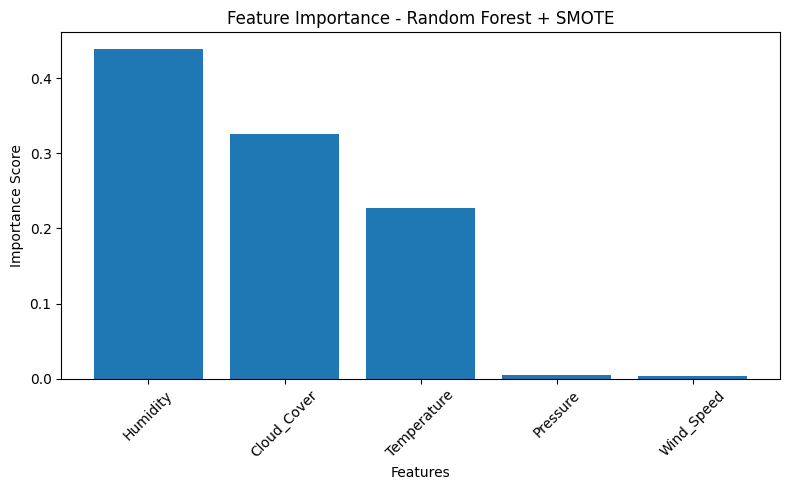

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained Random Forest + SMOTE model
importances = rf_smote.feature_importances_
feature_names = X.columns  # or list(X_train.columns) if you prefer

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 5))
plt.title("Feature Importance - Random Forest + SMOTE")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

**Interpretation**:
- **Humidity** and **Cloud_Cover** are the most important features — rain is much more likely when humidity is high and skies are cloudy.
- **Pressure** usually comes next (lower pressure → more rain).
- **Temperature** and **Wind_Speed** have lower importance — they help less in this dataset.

## Conclusion

**Best model**: Random Forest + SMOTE  
→ Good balance between overall accuracy and rain detection (higher recall for rain class).

**Main lesson**:  
Accuracy looks good on imbalanced data, but it hides poor performance on the minority class (rain).  
SMOTE + looking at recall/confusion matrix gives a more honest picture.

**What I learned**:
- Always check class balance first
- Use more than just accuracy for classification
- Simple techniques like SMOTE can make big improvements

**Next possible steps**:
- Try XGBoost or LightGBM
- Tune model parameters
- Plot feature importance

**Quick note**: Baseline Random Forest is almost perfect (0.998 accuracy) — likely due to the synthetic/clean dataset. Real data would be harder, and SMOTE would help more noticeably.